# REGULARISED LINEAR REGRESSION

## OBJECTIVE: Discover any relationship between healtcare resources and socio-demographic data

## 0. DATA INGESTION

In [31]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LassoCV
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_percentage_error, median_absolute_error

### 0.0. Bring the original data set

In [2]:
df_health_demographic = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")

## 1. General information about the dataset:

### 1.0. Shape, missing values, and data type


In [3]:
df_health_demographic

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.21,7637,13.74,6878,12.37,7089,12.75,...,3644,12.90,11.90,13.80,5462,3.10,2.90,3.30,1326,3
1,1003,218022,24757,11.36,26913,12.34,23579,10.81,25213,11.56,...,14692,12.00,11.00,13.10,20520,3.20,3.00,3.50,5479,4
2,1005,24881,2732,10.98,2960,11.90,3268,13.13,3201,12.87,...,2373,19.70,18.60,20.60,3870,4.50,4.20,4.80,887,6
3,1007,22400,2456,10.96,2596,11.59,3029,13.52,3113,13.90,...,1789,14.10,13.20,14.90,2511,3.30,3.10,3.60,595,2
4,1009,57840,7095,12.27,7570,13.09,6742,11.66,6884,11.90,...,4661,13.50,12.60,14.50,6017,3.40,3.20,3.70,1507,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,6104,14.18,6326,14.69,5359,12.45,6577,15.28,...,2098,8.90,8.30,9.60,2834,2.60,2.40,2.80,821,5
3136,56039,23081,2384,10.33,2185,9.47,2967,12.85,4093,17.73,...,928,7.20,6.50,8.00,1360,2.40,2.20,2.60,447,5
3137,56041,20299,3121,15.38,3205,15.79,2153,10.61,2702,13.31,...,1163,10.40,9.50,11.20,1500,3.00,2.80,3.20,430,5
3138,56043,7885,858,10.88,1113,14.12,715,9.07,903,11.45,...,506,11.30,10.30,12.10,686,3.40,3.20,3.70,207,6


In [4]:
df_health_demographic.shape

(3140, 108)

In [5]:
missing_values = df_health_demographic.isnull().sum()
missing_values

fips                      0
TOT_POP                   0
0-9                       0
0-9 y/o % of total pop    0
19-Oct                    0
                         ..
CKD_prevalence            0
CKD_Lower 95% CI          0
CKD_Upper 95% CI          0
CKD_number                0
Urban_rural_code          0
Length: 108, dtype: int64

In [6]:
df_health_demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


### 1.1. Checking for duplicates in the dataset and removing them if necessary

In [7]:
df_health_demographic.duplicated().sum()

np.int64(0)

### 1.2. Information about number of null or empty values in each column

In [8]:
df_health_demographic.isnull().sum()

fips                      0
TOT_POP                   0
0-9                       0
0-9 y/o % of total pop    0
19-Oct                    0
                         ..
CKD_prevalence            0
CKD_Lower 95% CI          0
CKD_Upper 95% CI          0
CKD_number                0
Urban_rural_code          0
Length: 108, dtype: int64

<Axes: >

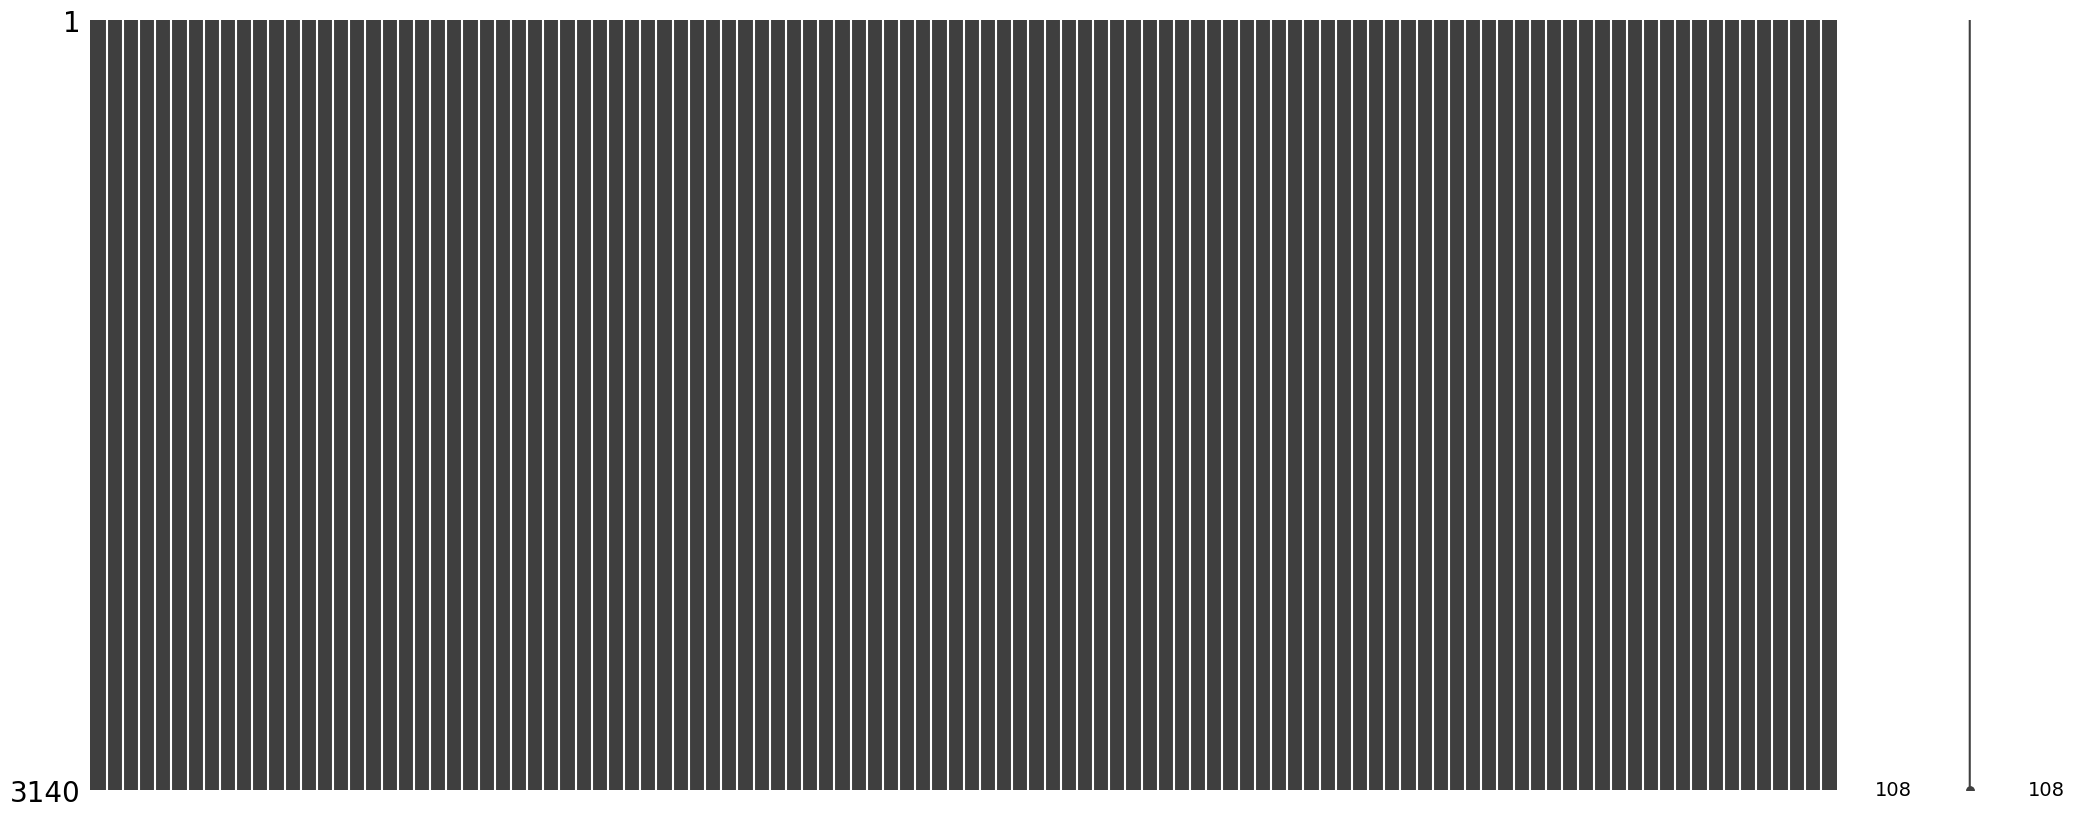

In [9]:
msno.matrix(df_health_demographic)

In [10]:
df_health_demographic = df_health_demographic.fillna(df_health_demographic.mean(numeric_only = True))
df_health_demographic.isna().sum()

fips                      0
TOT_POP                   0
0-9                       0
0-9 y/o % of total pop    0
19-Oct                    0
                         ..
CKD_prevalence            0
CKD_Lower 95% CI          0
CKD_Upper 95% CI          0
CKD_number                0
Urban_rural_code          0
Length: 108, dtype: int64

## 2. Create a regularised linear regression model:

### 2.0. Encoding categorical variables

In [11]:
df_encoded = pd.get_dummies(df_health_demographic, drop_first = True)

### 2.1. Scale the data

In [12]:
X = df_encoded.drop(columns = "diabetes_prevalence", axis = 1)
y = df_encoded["diabetes_prevalence"]

In [13]:
training_data, temp_data = train_test_split(df_encoded, test_size = 0.4, random_state = 42)
testing_data, anonymous_data = train_test_split(temp_data, test_size = 0.5, random_state = 42)
training_data.shape, testing_data.shape, anonymous_data.shape, df_encoded.shape

((1884, 1996), (628, 1996), (628, 1996), (3140, 1996))

In [14]:
X_train = training_data.drop(columns = "diabetes_prevalence")
y_train = training_data["diabetes_prevalence"]
X_test = testing_data.drop(columns = "diabetes_prevalence")
y_test = testing_data["diabetes_prevalence"]

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 3. Create a linear regression model (No regularised):

### 3.0. Data modelling and training

In [18]:
m_linear = LinearRegression().fit(X_train_scaled, y_train)
yhat_train_linear = m_linear.predict(X_train_scaled)
yhat_linear = m_linear.predict(X_test_scaled)

### 3.1. Metrics calculation

In [19]:
def get_metrics(yhat, y_test, yhat_train, y_train):
    metrics_train = (
        r2_score(y_train, yhat_train),
        median_absolute_error(y_train, yhat_train),
        mean_absolute_percentage_error(y_train, yhat_train) * 100
    )
    metrics_test = (
        r2_score(y_test, yhat),
        median_absolute_error(y_test, yhat),
        mean_absolute_percentage_error(y_test, yhat) * 100
    )
    metrics_diff = list(map(lambda x: x[1] - x[0], zip(metrics_train, metrics_test)))
    return pd.DataFrame(
        data=[metrics_train, metrics_test, metrics_diff],
        columns=["R2", "Median Absolute Error", "Mean Absolute Percentage Error"],
        index=["Train", "Test", "Difference"]
    )

In [20]:
get_metrics(yhat_linear, y_test, yhat_train_linear, y_train)

,R2,Median Absolute Error,Mean Absolute Percentage Error
Train,1.00,0.00,0.10
Test,0.96,0.05,1.33
Difference,-0.04,0.05,1.24


<span style="color:yellow">ATENTION: It give us R² = 1. It can not be pefect. There has been overfitting.

<pan style="color:orange">NOTE: The model has memorised the data. This happens when we have many variables (columns) and far fewer data points (rows).

We are going to penalize (regulate) the learning

C.G.W.</span>

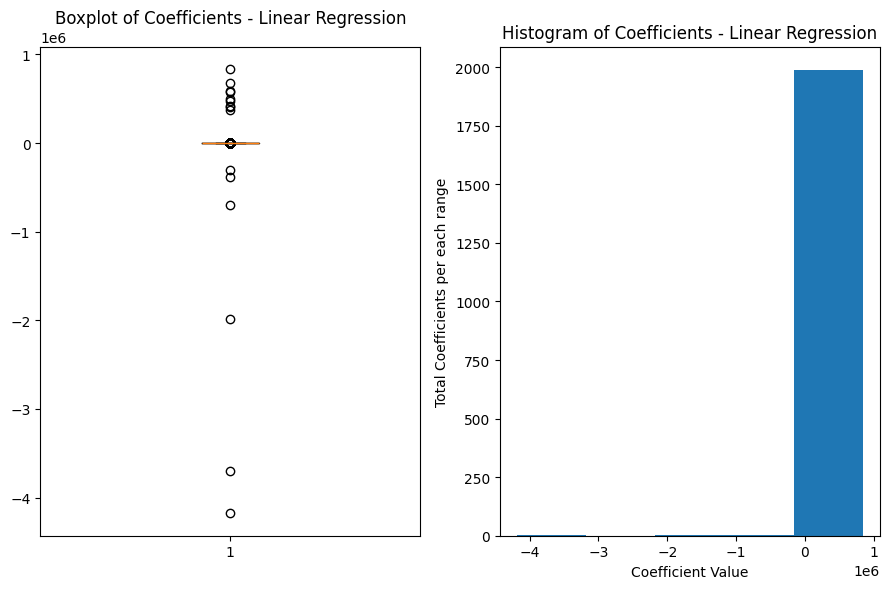

In [21]:
plt.figure(figsize = (9, 6))
plt.subplot(1, 2, 1)
plt.boxplot(m_linear.coef_)
plt.title("Boxplot of Coefficients - Linear Regression")
plt.subplot(1, 2, 2)
plt.hist(m_linear.coef_, 5)
plt.title("Histogram of Coefficients - Linear Regression")
plt.xlabel("Coefficient Value")
plt.ylabel("Total Coefficients per each range")
plt.tight_layout()
plt.show()

## 4. Create a regularised linear regression model:

### 4.0. Perform cross-validation

Let's calculate how stronly we are going to penalise learning.

Let's choose the lamda with th best score.

In [22]:
m_lasso = LassoCV(alphas = np.logspace(-6, 6, 10), cv = 5, random_state = 42, n_jobs = -1).fit(X_train_scaled, y_train)
yhat_train_lasso = m_lasso.predict(X_train_scaled)
yhat_lasso = m_lasso.predict(X_test_scaled)

### 4.1. Metrics Calculation

In [23]:
get_metrics(yhat_lasso, y_test, yhat_train_lasso, y_train)

,R2,Median Absolute Error,Mean Absolute Percentage Error
Train,1.00,0.04,0.27
Test,1.00,0.04,0.29
Difference,0.00,0.00,0.01


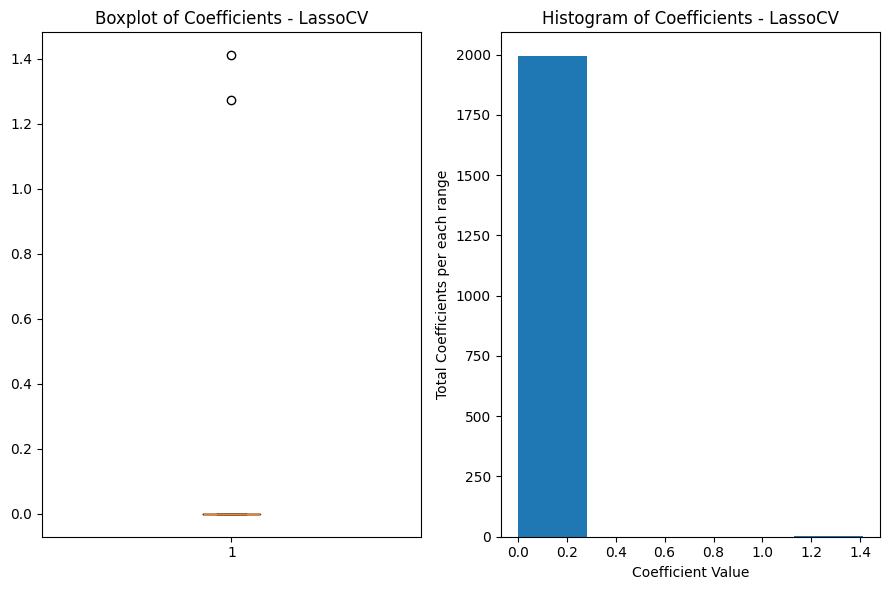

In [25]:
plt.figure(figsize = (9, 6))
plt.subplot(1, 2, 1)
plt.boxplot(m_lasso.coef_)
plt.title("Boxplot of Coefficients - LassoCV")
plt.subplot(1, 2, 2)
plt.hist(m_lasso.coef_, 5)
plt.title("Histogram of Coefficients - LassoCV")
plt.xlabel("Coefficient Value")
plt.ylabel("Total Coefficients per each range")
plt.tight_layout()
plt.show()

In [26]:
m_lasso.coef_

array([-0., -0., -0., ...,  0., -0.,  0.], shape=(1995,))

## 5. Conclusions

### 5.0. Cancelated and used variables:

In [27]:
print(f"Cancelated variables percentage: {round(len(m_lasso.coef_[np.abs(m_lasso.coef_) < 1e-4]) / len(m_lasso.coef_) * 100, 2)}%")
print(f"The model use {len(m_lasso.coef_[np.abs(m_lasso.coef_) >= 1e-4])} variables out of {len(m_lasso.coef_)}")

Cancelated variables percentage: 99.9%
The model use 2 variables out of 1995


In [29]:
variables = X_train.columns
used_variables = variables[np.abs(m_lasso.coef_) >= 1e-4]
print("Variables used by Lasso:", list(used_variables))

Variables used by Lasso: ['diabetes_Lower 95% CI', 'diabetes_Upper 95% CI']


### 5.1. Relationship between healtcare resources and socio-demographic data:

The most important variables of the data set, with a strong relationship between healtcare resources and socio-demographic data are:

- "diabetes_prevalence"
- "diabetes_Lower 95% CI"
- "diabetes_Upper 95% CI"